In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


# CSN gender BOX

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_box.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_box.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_box.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_box.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_box.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_box.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-box'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [4]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-30 23:48:31,331 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-30 23:48:31,332 - mmaction - INFO - Use load_from_http loader
2021-08-30 23:48:33,419 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-30 23:48:33,420 - mmaction - INFO - Use load_from_local loader
2021-08-30 23:48:33,580 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-30 23:48:33,587 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.5 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:50:23,008 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:50:23,011 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-30 23:50:23,011 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:50:23,013 - mmaction - INFO - 
mean_acc	0.9286
2021-08-30 23:50:23,339 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-30 23:50:23,340 - mmaction - INFO - Best top1_acc is 0.9091 at 5 epoch.
2021-08-30 23:50:23,341 - mmaction - INFO - Epoch(val) [5][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 9.0 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:52:11,356 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:52:11,357 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-30 23:52:11,358 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:52:11,358 - mmaction - INFO - 
mean_acc	0.9286
2021-08-30 23:52:11,359 - mmaction - INFO - Epoch(val) [10][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.9 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:53:59,660 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:53:59,661 - mmaction - INFO - 
top1_acc	0.8182
top5_acc	1.0000
2021-08-30 23:53:59,662 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:53:59,663 - mmaction - INFO - 
mean_acc	0.8036
2021-08-30 23:53:59,664 - mmaction - INFO - Epoch(val) [15][2]	top1_acc: 0.8182, top5_acc: 1.0000, mean_class_accuracy: 0.8036
2021-08-30 23:55:47,107 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.6 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:55:48,790 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:55:48,792 - mmaction - INFO - 
top1_acc	0.7273
top5_acc	1.0000
2021-08-30 23:55:48,792 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:55:48,794 - mmaction - INFO - 
mean_acc	0.6786
2021-08-30 23:55:48,794 - mmaction - INFO - Epoch(val) [20][2]	top1_acc: 0.7273, top5_acc: 1.0000, mean_class_accuracy: 0.6786


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 9.0 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:57:37,899 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:57:37,901 - mmaction - INFO - 
top1_acc	0.7273
top5_acc	1.0000
2021-08-30 23:57:37,902 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:57:37,903 - mmaction - INFO - 
mean_acc	0.6786
2021-08-30 23:57:37,903 - mmaction - INFO - Epoch(val) [25][2]	top1_acc: 0.7273, top5_acc: 1.0000, mean_class_accuracy: 0.6786


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.8 task/s, elapsed: 1s, ETA:     0s

2021-08-30 23:59:26,839 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-30 23:59:26,841 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-30 23:59:26,842 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-30 23:59:26,843 - mmaction - INFO - 
mean_acc	0.9286
2021-08-30 23:59:26,844 - mmaction - INFO - Epoch(val) [30][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 9.1 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:01:15,401 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:01:15,402 - mmaction - INFO - 
top1_acc	0.8182
top5_acc	1.0000
2021-08-31 00:01:15,403 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:01:15,404 - mmaction - INFO - 
mean_acc	0.8036
2021-08-31 00:01:15,404 - mmaction - INFO - Epoch(val) [35][2]	top1_acc: 0.8182, top5_acc: 1.0000, mean_class_accuracy: 0.8036
2021-08-31 00:03:02,825 - mmaction - INFO - Saving checkpoint at 40 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.7 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:03:04,503 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:03:04,506 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-31 00:03:04,507 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:03:04,509 - mmaction - INFO - 
mean_acc	0.9286
2021-08-31 00:03:04,510 - mmaction - INFO - Epoch(val) [40][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.9 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:04:53,694 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:04:53,696 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-31 00:04:53,697 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:04:53,697 - mmaction - INFO - 
mean_acc	0.9286
2021-08-31 00:04:53,698 - mmaction - INFO - Epoch(val) [45][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286
2021-08-31 00:06:41,217 - mmaction - INFO - Saving checkpoint at 50 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 11/11, 8.5 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:06:42,902 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:06:42,903 - mmaction - INFO - 
top1_acc	0.9091
top5_acc	1.0000
2021-08-31 00:06:42,903 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:06:42,904 - mmaction - INFO - 
mean_acc	0.9286
2021-08-31 00:06:42,905 - mmaction - INFO - Epoch(val) [50][2]	top1_acc: 0.9091, top5_acc: 1.0000, mean_class_accuracy: 0.9286


In [5]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model
import pickle
import mmcv
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

model = pickle.load(open(f"{cfg.work_dir}/model50e", 'rb'))

2021-08-10 16:54:18,016 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-10 16:54:18,017 - mmaction - INFO - Use load_from_http loader


In [6]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 8/8, 0.5 task/s, elapsed: 15s, ETA:     0s
Evaluating top_k_accuracy ...

top1_acc	1.0000
top5_acc	1.0000

Evaluating mean_class_accuracy ...

mean_acc	1.0000
top1_acc: 1.0000
top5_acc: 1.0000
mean_class_accuracy: 1.0000


<AxesSubplot:>

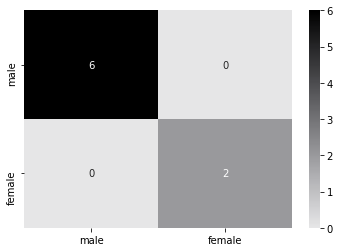

In [7]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])

# CSN gender CLAP

In [1]:
cd /home/robt427nv/childact/

/home/robt427nv/childact


In [2]:
from mmcv import Config
cfg = Config.fromfile('mmaction2/configs/recognition/csn/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb.py')

In [3]:
from mmcv.runner import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'VideoDataset'
cfg.data_root = 'age-gender-3split-rgb-frames/'
cfg.data_root_val = 'age-gender-3split-rgb-frames/val/'
cfg.ann_file_train = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_clap.txt'
cfg.ann_file_val = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_clap.txt'
cfg.ann_file_test = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_clap.txt'

# cfg.data.test.type = 'VideoDataset'
cfg.data.test.ann_file = 'age-gender-3split-rgb-frames/childact_test_rgb320_gender_clap.txt'
cfg.data.test.data_prefix = 'age-gender-3split-rgb-frames/test/'

# cfg.data.train.type = 'VideoDataset'
cfg.data.train.ann_file = 'age-gender-3split-rgb-frames/childact_train_rgb320_gender_clap.txt'
cfg.data.train.data_prefix = 'age-gender-3split-rgb-frames/train/'

# cfg.data.val.type = 'VideoDataset'
cfg.data.val.ann_file = 'age-gender-3split-rgb-frames/childact_val_rgb320_gender_clap.txt'
cfg.data.val.data_prefix = 'age-gender-3split-rgb-frames/val/'

# cfg.data.test.modality = 'Flow'
# cfg.data.val.modality = 'Flow'
# cfg.data.train.modality = 'Flow'

# cfg.data.train.start_index = 0
# cfg.data.test.start_index = 0
# cfg.data.val.start_index = 0

cfg.data.test.filename_tmpl = '{:03}.jpeg'
cfg.data.train.filename_tmpl = '{:03}.jpeg'
cfg.data.val.filename_tmpl = '{:03}.jpeg'
# The flag is used to determine whether it is omnisource training
cfg.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg.model.cls_head.num_classes = 2
# We can use the pre-trained TSN model
cfg.load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
# cfg.resume_from = './childact-mm/latest.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './childact-checkpoints/CSN-gender-clap'

cfg.total_epochs = 50

# cfg.momentum_config = dict(
#     policy='cyclic',
#     target_ratio=(0.85 / 0.95, 1),
#     cyclic_times=1,
#     step_ratio_up=0.4,
# )

# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 20
# We can set the log print interval to reduce the the times of printing log
cfg.log_config.interval = 100

# Set seed thus the results are more reproducible
cfg.seed = 42
set_random_seed(42, deterministic=False)
cfg.gpu_ids = range(1)

cfg.data.videos_per_gpu=6

# cfg.model.backbone.in_channels = 2

cfg.output_config = dict(out=f'{cfg.work_dir}/results.json')
# We can initialize the logger for training and have a look
# at the final config used for training
# del cfg.optimizer['momentum']
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='ResNet3dCSN',
        pretrained2d=False,
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth',
        depth=152,
        with_pool2=False,
        bottleneck_mode='ir',
        norm_eval=True,
        zero_init_residual=False,
        bn_frozen=True),
    cls_head=dict(
        type='I3DHead',
        num_classes=2,
        in_channels=2048,
        spatial_type='avg',
        dropout_ratio=0.5,
        init_std=0.01),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
checkpoint_config = dict(interval=20)
log_config = dict(interval=100, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth'
resume_from = None
workflow = [('train', 1)]
dataset_type = 'RawframeDataset

In [ ]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model

import mmcv

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# model = build_detector(cfg.model, train_cfg=cfg.train_cfg, test_cfg=cfg.test_cfg)
# CUDA_LAUNCH_BLOCKING=1
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True)

2021-08-31 00:11:25,322 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-31 00:11:25,323 - mmaction - INFO - Use load_from_http loader
2021-08-31 00:11:27,490 - mmaction - INFO - load checkpoint from checkpoints/ircsn_ig65m_pretrained_bnfrozen_r152_32x2x1_58e_kinetics400_rgb_20200812-9037a758.pth
2021-08-31 00:11:27,491 - mmaction - INFO - Use load_from_local loader
2021-08-31 00:11:27,634 - mmaction - WARNING - The model and loaded state dict do not match exactly

size mismatch for cls_head.fc_cls.weight: copying a param with shape torch.Size([400, 2048]) from checkpoint, the shape in current model is torch.Size([2, 2048]).
size mismatch for cls_head.fc_cls.bias: copying a param with shape torch.Size([400]) from checkpoint, the shape in current model is torch.Size([2]).
2021-08-31 00:11:27,640 - mmaction - INFO - Start running, host: robt427nv@robt427NV, work_dir: /home/robt427nv/ch

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.5 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:13:39,626 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:13:39,627 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:13:39,628 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:13:39,629 - mmaction - INFO - 
mean_acc	0.8125
2021-08-31 00:13:39,942 - mmaction - INFO - Now best checkpoint is saved as best_top1_acc_epoch_5.pth.
2021-08-31 00:13:39,943 - mmaction - INFO - Best top1_acc is 0.7857 at 5 epoch.
2021-08-31 00:13:39,944 - mmaction - INFO - Epoch(val) [5][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.8125


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 10.1 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:15:51,861 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:15:51,862 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:15:51,863 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:15:51,864 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:15:51,865 - mmaction - INFO - Epoch(val) [10][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.7 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:18:00,494 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:18:00,496 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:18:00,497 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:18:00,498 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:18:00,500 - mmaction - INFO - Epoch(val) [15][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917
2021-08-31 00:20:07,685 - mmaction - INFO - Saving checkpoint at 20 epochs


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.1 task/s, elapsed: 2s, ETA:     0s

2021-08-31 00:20:09,620 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:20:09,621 - mmaction - INFO - 
top1_acc	0.7143
top5_acc	1.0000
2021-08-31 00:20:09,623 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:20:09,624 - mmaction - INFO - 
mean_acc	0.7500
2021-08-31 00:20:09,625 - mmaction - INFO - Epoch(val) [20][3]	top1_acc: 0.7143, top5_acc: 1.0000, mean_class_accuracy: 0.7500


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 9.5 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:22:18,429 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:22:18,430 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:22:18,431 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:22:18,432 - mmaction - INFO - 
mean_acc	0.8125
2021-08-31 00:22:18,433 - mmaction - INFO - Epoch(val) [25][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.8125


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 14/14, 10.0 task/s, elapsed: 1s, ETA:     0s

2021-08-31 00:24:27,050 - mmaction - INFO - Evaluating top_k_accuracy ...
2021-08-31 00:24:27,051 - mmaction - INFO - 
top1_acc	0.7857
top5_acc	1.0000
2021-08-31 00:24:27,052 - mmaction - INFO - Evaluating mean_class_accuracy ...
2021-08-31 00:24:27,052 - mmaction - INFO - 
mean_acc	0.7917
2021-08-31 00:24:27,053 - mmaction - INFO - Epoch(val) [30][3]	top1_acc: 0.7857, top5_acc: 1.0000, mean_class_accuracy: 0.7917


In [ ]:
import pickle

with open(f"{cfg.work_dir}/model50e", 'wb') as f:
    pickle.dump(model, f)

In [6]:
import os.path as osp

from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model
import pickle
import mmcv
# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the recognizer
model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

model = pickle.load(open(f"{cfg.work_dir}/model50e", 'rb'))

2021-08-10 16:54:18,016 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/csn/ircsn_from_scratch_r152_ig65m_20200807-771c4135.pth
2021-08-10 16:54:18,017 - mmaction - INFO - Use load_from_http loader


In [ ]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel
# from mmaction.models import build_model
# from mmaction.datasets import build_dataset

# model = build_model(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Build a test dataloader
dataset = build_dataset(cfg.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)
model = MMDataParallel(model, device_ids=[0])
outputs = single_gpu_test(model, data_loader)

eval_config = cfg.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')
    
output_config = cfg.output_config
dataset.dump_results(outputs, **output_config)

In [ ]:
import seaborn as sns
import numpy as np
from mmaction.core import confusion_matrix 

gt_labels = [ann['label'] for ann in dataset.load_annotations()]
pred = np.argmax(outputs, axis=1)
cf_mat = confusion_matrix(pred, gt_labels).astype(float)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
# /np.sum(cf_mat), fmt='.2%',
# sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['6yo', '7yo', '8yo'], yticklabels = ['6yo', '7yo', '8yo'])
sns.heatmap(cf_mat, cmap=cmap, annot=True, xticklabels = ['male','female'], yticklabels = ['male','female'])